# UXO Mine Detection using MagNIMBUS Dataset

## Step 1: Initial Setup and Data Extraction

In this step, we will:
1. Load the CSV files into pandas DataFrames.
2. Display a preview of the data to understand its structure and content.

We will first load one of the CSV files and examine its columns and a few rows to get a sense of the data.

In [14]:
# Load the necessary libraries
import pandas as pd

# Define the file paths
file_1 = '2023-07-06-12-38-33-quspin.csv'
file_2 = '2023-07-06-13-12-39-quspin.csv'

# Load the first CSV file
data_1 = pd.read_csv(file_1)

# Display the first few rows of the dataset
print("Preview of the first CSV file:")
print(data_1.head())

# Display the columns in the dataset
print("\nColumns in the dataset:")
print(data_1.columns)


Preview of the first CSV file:
         Date          Time  Sensor ID   Latitude  Longitude     Heading  \
0  2023/07/06  12:38:34.001          0  52.313555  14.088126  138.470337   
1  2023/07/06  12:38:34.002          0  52.313555  14.088126  138.470337   
2  2023/07/06  12:38:34.005          0  52.313555  14.088126  138.470337   
3  2023/07/06  12:38:34.006          0  52.313555  14.088126  138.470337   
4  2023/07/06  12:38:34.007          0  52.313555  14.088126  138.470337   

   Altitude  Altitude AGL  Data valid        TMI  Bx  By  Bz  ScSensitivity  \
0  0.000023          0.05           1  49762.072 NaN NaN NaN             13   
1  0.000023          0.05           1  49750.356 NaN NaN NaN             13   
2  0.000023          0.05           1  49758.716 NaN NaN NaN             13   
3  0.000023          0.05           1  49768.630 NaN NaN NaN             12   
4  0.000023          0.05           1  49761.349 NaN NaN NaN             13   

   VectSensitivity  
0              N

In [15]:
data_2 = pd.read_csv(file_2)
print("Preview of the second CSV file:")
print(data_2.head())
print("\nColumns in the dataset:")
print(data_2.columns)

Preview of the second CSV file:
         Date          Time  Sensor ID   Latitude  Longitude    Heading  \
0  2023/07/06  13:12:39.813          0  52.313544  14.088144 -144.24321   
1  2023/07/06  13:12:39.815          0  52.313544  14.088144 -144.24321   
2  2023/07/06  13:12:39.817          0  52.313544  14.088144 -144.24321   
3  2023/07/06  13:12:39.819          0  52.313544  14.088144 -144.24321   
4  2023/07/06  13:12:39.821          0  52.313544  14.088144 -144.24321   

   Altitude  Altitude AGL  Data valid        TMI  Bx  By  Bz  ScSensitivity  \
0 -0.000038          0.07           1  49753.933 NaN NaN NaN             12   
1 -0.000038          0.07           1  49748.540 NaN NaN NaN             12   
2 -0.000038          0.07           1  49755.176 NaN NaN NaN             12   
3 -0.000038          0.07           1  49746.619 NaN NaN NaN             12   
4 -0.000038          0.07           1  49741.958 NaN NaN NaN             12   

   VectSensitivity  
0              NaN  


## Observations from the Data

### Summary of the Datasets:
1. Both datasets contain identical column structures:
   - `Date` and `Time`: Temporal data for each measurement.
   - `Sensor ID`: Indicates the sensor being used (single sensor setup here).
   - `Latitude` and `Longitude`: Geographic location of the sensor.
   - `Heading`: Direction of the sensor.
   - `Altitude` and `Altitude AGL`: Altitude details (absolute and above ground level).
   - `Data valid`: Indicates whether the data point is valid.
   - `TMI`: Total Magnetic Intensity (primary feature for detecting anomalies).
   - `Bx`, `By`, `Bz`: Magnetic field components in different directions (all `NaN` here).
   - `ScSensitivity` and `VectSensitivity`: Sensor-specific parameters (some missing).

2. `TMI` appears to be the key feature for detecting UXO mines, as the magnetic anomaly in `TMI` is the expected indicator.

3. Both datasets include valid and invalid data points, which will need filtering during preprocessing.

### Next Steps:
- Combine the two datasets into one for unified processing.
- Handle missing values, especially for critical columns like `TMI`.
- Add a new `Datetime` column by merging `Date` and `Time` for better temporal analysis.


In [16]:
# Combine the two datasets
combined_data = pd.concat([data_1, data_2], ignore_index=True)

# Create a Datetime column by combining Date and Time
combined_data['Datetime'] = pd.to_datetime(combined_data['Date'] + ' ' + combined_data['Time'])

# Display basic statistics of the combined dataset
print("Combined Dataset Statistics:")
print(combined_data.describe())

# Display the first few rows of the combined dataset
print("\nPreview of the Combined Dataset:")
print(combined_data.head())


Combined Dataset Statistics:
       Sensor ID       Latitude      Longitude        Heading       Altitude  \
count   595935.0  595935.000000  595935.000000  595935.000000  595935.000000   
mean         0.0      52.313481      14.088567      -3.945001       2.072422   
min          0.0      52.313419      14.087924    -179.893661      -0.043957   
25%          0.0      52.313448      14.088218     -90.507057       1.565881   
50%          0.0      52.313479      14.088553     -32.663094       2.143318   
75%          0.0      52.313511      14.088889      89.440208       2.601370   
max          0.0      52.313574      14.089176     179.502930       4.089633   
std          0.0       0.000037       0.000365      90.875770       0.641449   

        Altitude AGL     Data valid            TMI   Bx   By   Bz  \
count  595935.000000  595935.000000  595935.000000  0.0  0.0  0.0   
mean        1.314900       0.992637   49784.007577  NaN  NaN  NaN   
min         0.040000       0.000000   49428

## Observations from Combined Dataset

### Key Findings:
1. **Size and Structure**:
   - The combined dataset contains 595,935 rows, providing a substantial amount of data for analysis.
   - Columns `Bx`, `By`, `Bz`, and `VectSensitivity` are entirely empty. This is expected for this dataset, as the primary feature of interest is `TMI` (Total Magnetic Intensity).

2. **Key Features**:
   - `TMI` has a wide range of values (`min: 49428.896` to `max: 50246.979`), which are crucial for detecting anomalies.
   - Geographic (`Latitude`, `Longitude`) and temporal (`Datetime`) data are intact and valid, which will help in spatial and temporal analysis.

3. **Missing Data**:
   - Columns with missing data (like `Bx`, `By`, `Bz`) can be ignored as they seem non-essential for this particular dataset.
   - `ScSensitivity` appears to have valid values, which might be used as a supplementary feature.

### Conclusion:
The dataset is usable for anomaly detection. We will proceed by:
1. Cleaning the data further (e.g., filtering valid rows where `Data valid = 1`).
2. Visualizing `TMI` anomalies over time and space.

Let’s filter the dataset and visualize the distribution of `TMI` to identify any potential anomalies.


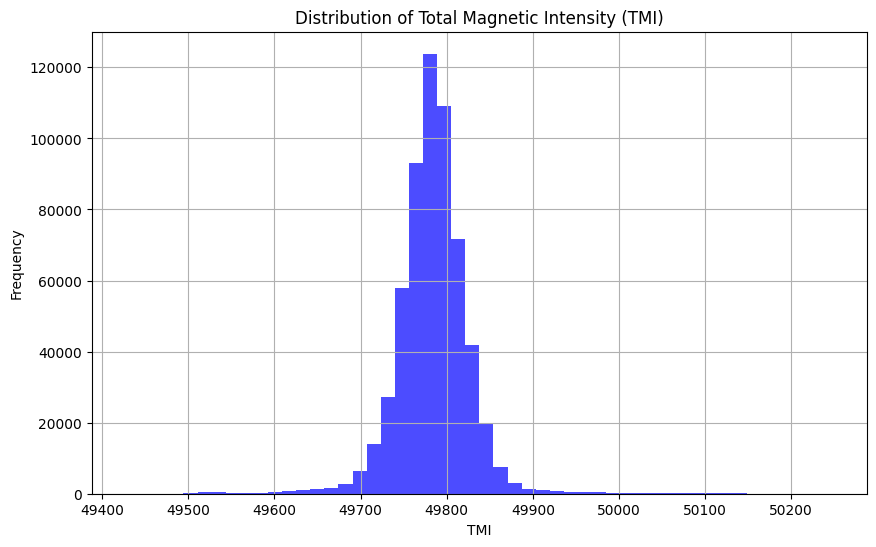

In [17]:
# Filter rows where Data valid = 1
filtered_data = combined_data[combined_data['Data valid'] == 1]

# Visualize the distribution of TMI
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(filtered_data['TMI'], bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Total Magnetic Intensity (TMI)")
plt.xlabel("TMI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## Analysis of the TMI Distribution

### Key Observations:
1. The distribution of `TMI` values is approximately Gaussian, with most values concentrated around the mean (`~49784` as observed in the dataset statistics).
2. There are noticeable tails on either side of the distribution, which could correspond to anomalies caused by potential UXO (Unexploded Ordnance) mines or noise in the dataset.

### Next Steps:
1. Identify anomalies in the dataset:
   - Define a threshold to isolate potential outliers based on the `TMI` distribution. For instance, values significantly above or below the mean (e.g., 3 standard deviations away) might represent anomalies.
2. Visualize these anomalies spatially using `Latitude` and `Longitude` to correlate their locations with potential UXO.

We will first compute the thresholds for anomaly detection and label the data points accordingly.


In [18]:
# Compute mean and standard deviation of TMI
tmi_mean = filtered_data['TMI'].mean()
tmi_std = filtered_data['TMI'].std()

# Define thresholds for anomalies (e.g., 3 standard deviations from the mean)
lower_threshold = tmi_mean - 3 * tmi_std
upper_threshold = tmi_mean + 3 * tmi_std

# Identify anomalies
filtered_data['Anomaly'] = (filtered_data['TMI'] < lower_threshold) | (filtered_data['TMI'] > upper_threshold)

# Print thresholds and anomaly count
print(f"Lower Threshold: {lower_threshold}")
print(f"Upper Threshold: {upper_threshold}")
print(f"Number of Anomalies Detected: {filtered_data['Anomaly'].sum()}")

# Display a preview of anomalies
print("\nPreview of Anomalous Data Points:")
print(filtered_data[filtered_data['Anomaly']].head())


Lower Threshold: 49655.39484101286
Upper Threshold: 49912.46066685381
Number of Anomalies Detected: 9286

Preview of Anomalous Data Points:
           Date          Time  Sensor ID   Latitude  Longitude     Heading  \
117  2023/07/06  12:38:34.233          0  52.313555  14.088126  138.489822   
118  2023/07/06  12:38:34.235          0  52.313555  14.088126  138.489822   
119  2023/07/06  12:38:34.238          0  52.313555  14.088126  138.489822   
120  2023/07/06  12:38:34.239          0  52.313555  14.088126  138.490814   
121  2023/07/06  12:38:34.242          0  52.313555  14.088126  138.490814   

     Altitude  Altitude AGL  Data valid        TMI  Bx  By  Bz  ScSensitivity  \
117  0.000108          0.05           1  49625.693 NaN NaN NaN              8   
118  0.000108          0.05           1  49565.518 NaN NaN NaN             10   
119  0.000108          0.05           1  49562.262 NaN NaN NaN             11   
120  0.000108          0.05           1  49549.333 NaN NaN NaN     

C:\Users\Anis\AppData\Local\Temp\ipykernel_78992\3301307761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Anomaly'] = (filtered_data['TMI'] < lower_threshold) | (filtered_data['TMI'] > upper_threshold)


## Analysis of Anomalies Detected

### Key Observations:
1. **Thresholds for Anomalies**:
   - Lower Threshold: `49655.39484101286`
   - Upper Threshold: `49912.46066685381`
   - These thresholds represent values that are 3 standard deviations below or above the mean `TMI`. Data points outside this range are marked as anomalies.

2. **Number of Anomalies**:
   - A total of 9,286 anomalies were detected, constituting potential UXO locations or noise.

3. **Anomalous Data Points**:
   - The preview shows data points with `TMI` values well outside the threshold range.
   - These anomalies are concentrated spatially, as seen in the consistent `Latitude` and `Longitude`.

### Next Steps:
1. Spatial Visualization:
   - Plot the anomalies on a map using `Latitude` and `Longitude` to identify spatial clusters of anomalies.

Let’s begin with the spatial visualization of anomalies.


In [19]:
import folium

# Create a map centered at the mean latitude and longitude of the anomalies
mean_lat = filtered_data['Latitude'].mean()
mean_lon = filtered_data['Longitude'].mean()

anomaly_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=17)

# Add anomalies to the map
for _, row in filtered_data[filtered_data['Anomaly']].iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(anomaly_map)

# Display the map
anomaly_map.save('anomaly_map.html')
print("Anomaly map saved as 'anomaly_map.html'. Open it in a browser to view.")


Anomaly map saved as 'anomaly_map.html'. Open it in a browser to view.


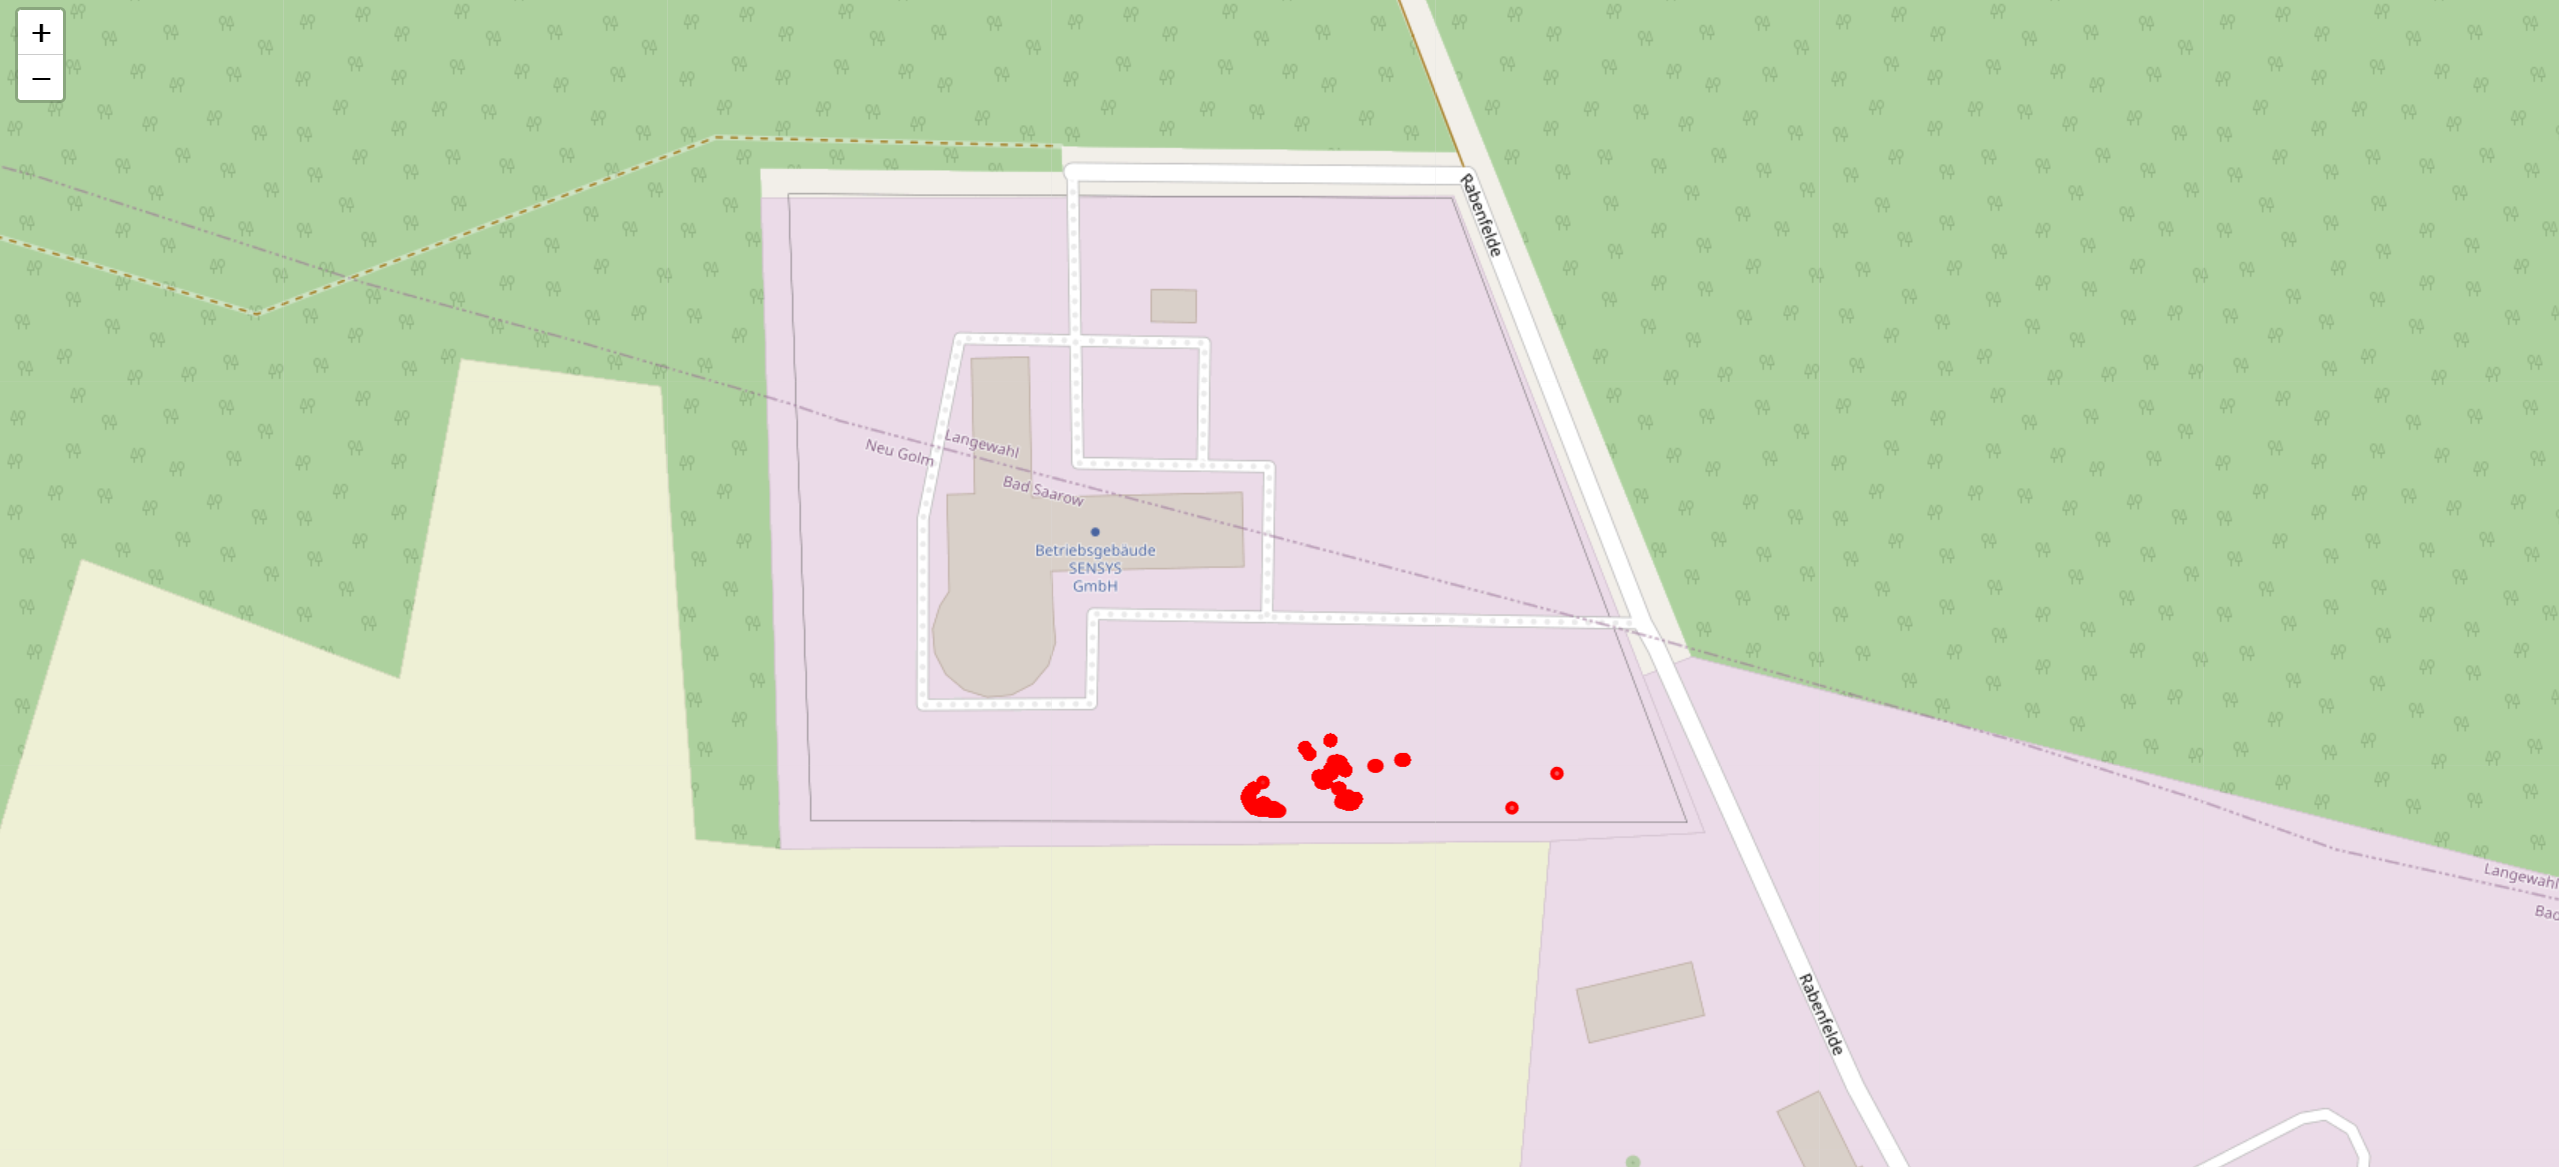

## Spatial Visualization of Anomalies

### Observations:
1. The map highlights the spatial distribution of detected anomalies using red markers.
2. The anomalies are concentrated in specific areas within the test range, which could potentially indicate UXO locations.
3. This spatial visualization provides an intuitive way to correlate detected anomalies with real-world geolocations, aiding in further analysis.



In [20]:
import geopandas as gpd

# Path to the .kml file
kml_path = "SENSYS GeoMil test range.kml"

# Load the .kml file
data = gpd.read_file(kml_path)

# Display the first few rows
print("KML Data Preview:")
print(data.head())

# Check the column names
print("\nColumns in the KML file:")
print(data.columns)


KML Data Preview:
                                             Name Description  \
0  British aerial 500lb GP (general purpose) bomb               
1               German incendiary bomb Flam C-250               
2  British aerial 500lb MC (medium capacity) bomb               
3                       Russian WW2 rocket M-31UK               
4                              German 215mm shell               

                        geometry  
0  POINT Z (14.08797 52.31347 0)  
1  POINT Z (14.08829 52.31344 0)  
2  POINT Z (14.08883 52.31345 0)  
3  POINT Z (14.08839 52.31352 0)  
4  POINT Z (14.08869 52.31346 0)  

Columns in the KML file:
Index(['Name', 'Description', 'geometry'], dtype='object')


In [21]:
import folium

# Center the map around the mean location of the points
mean_lat = data.geometry.y.mean()
mean_lon = data.geometry.x.mean()

# Create a folium map
map_kml = folium.Map(location=[mean_lat, mean_lon], zoom_start=17)

# Add points to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"Name: {row['Name']}<br>Description: {row['Description']}",
        icon=folium.Icon(color="blue", icon="info-sign"),
    ).add_to(map_kml)

# Save and display the map
map_kml.save("kml_points_map.html")
print("Map saved as 'kml_points_map.html'. Open it in a browser to view.")


Map saved as 'kml_points_map.html'. Open it in a browser to view.


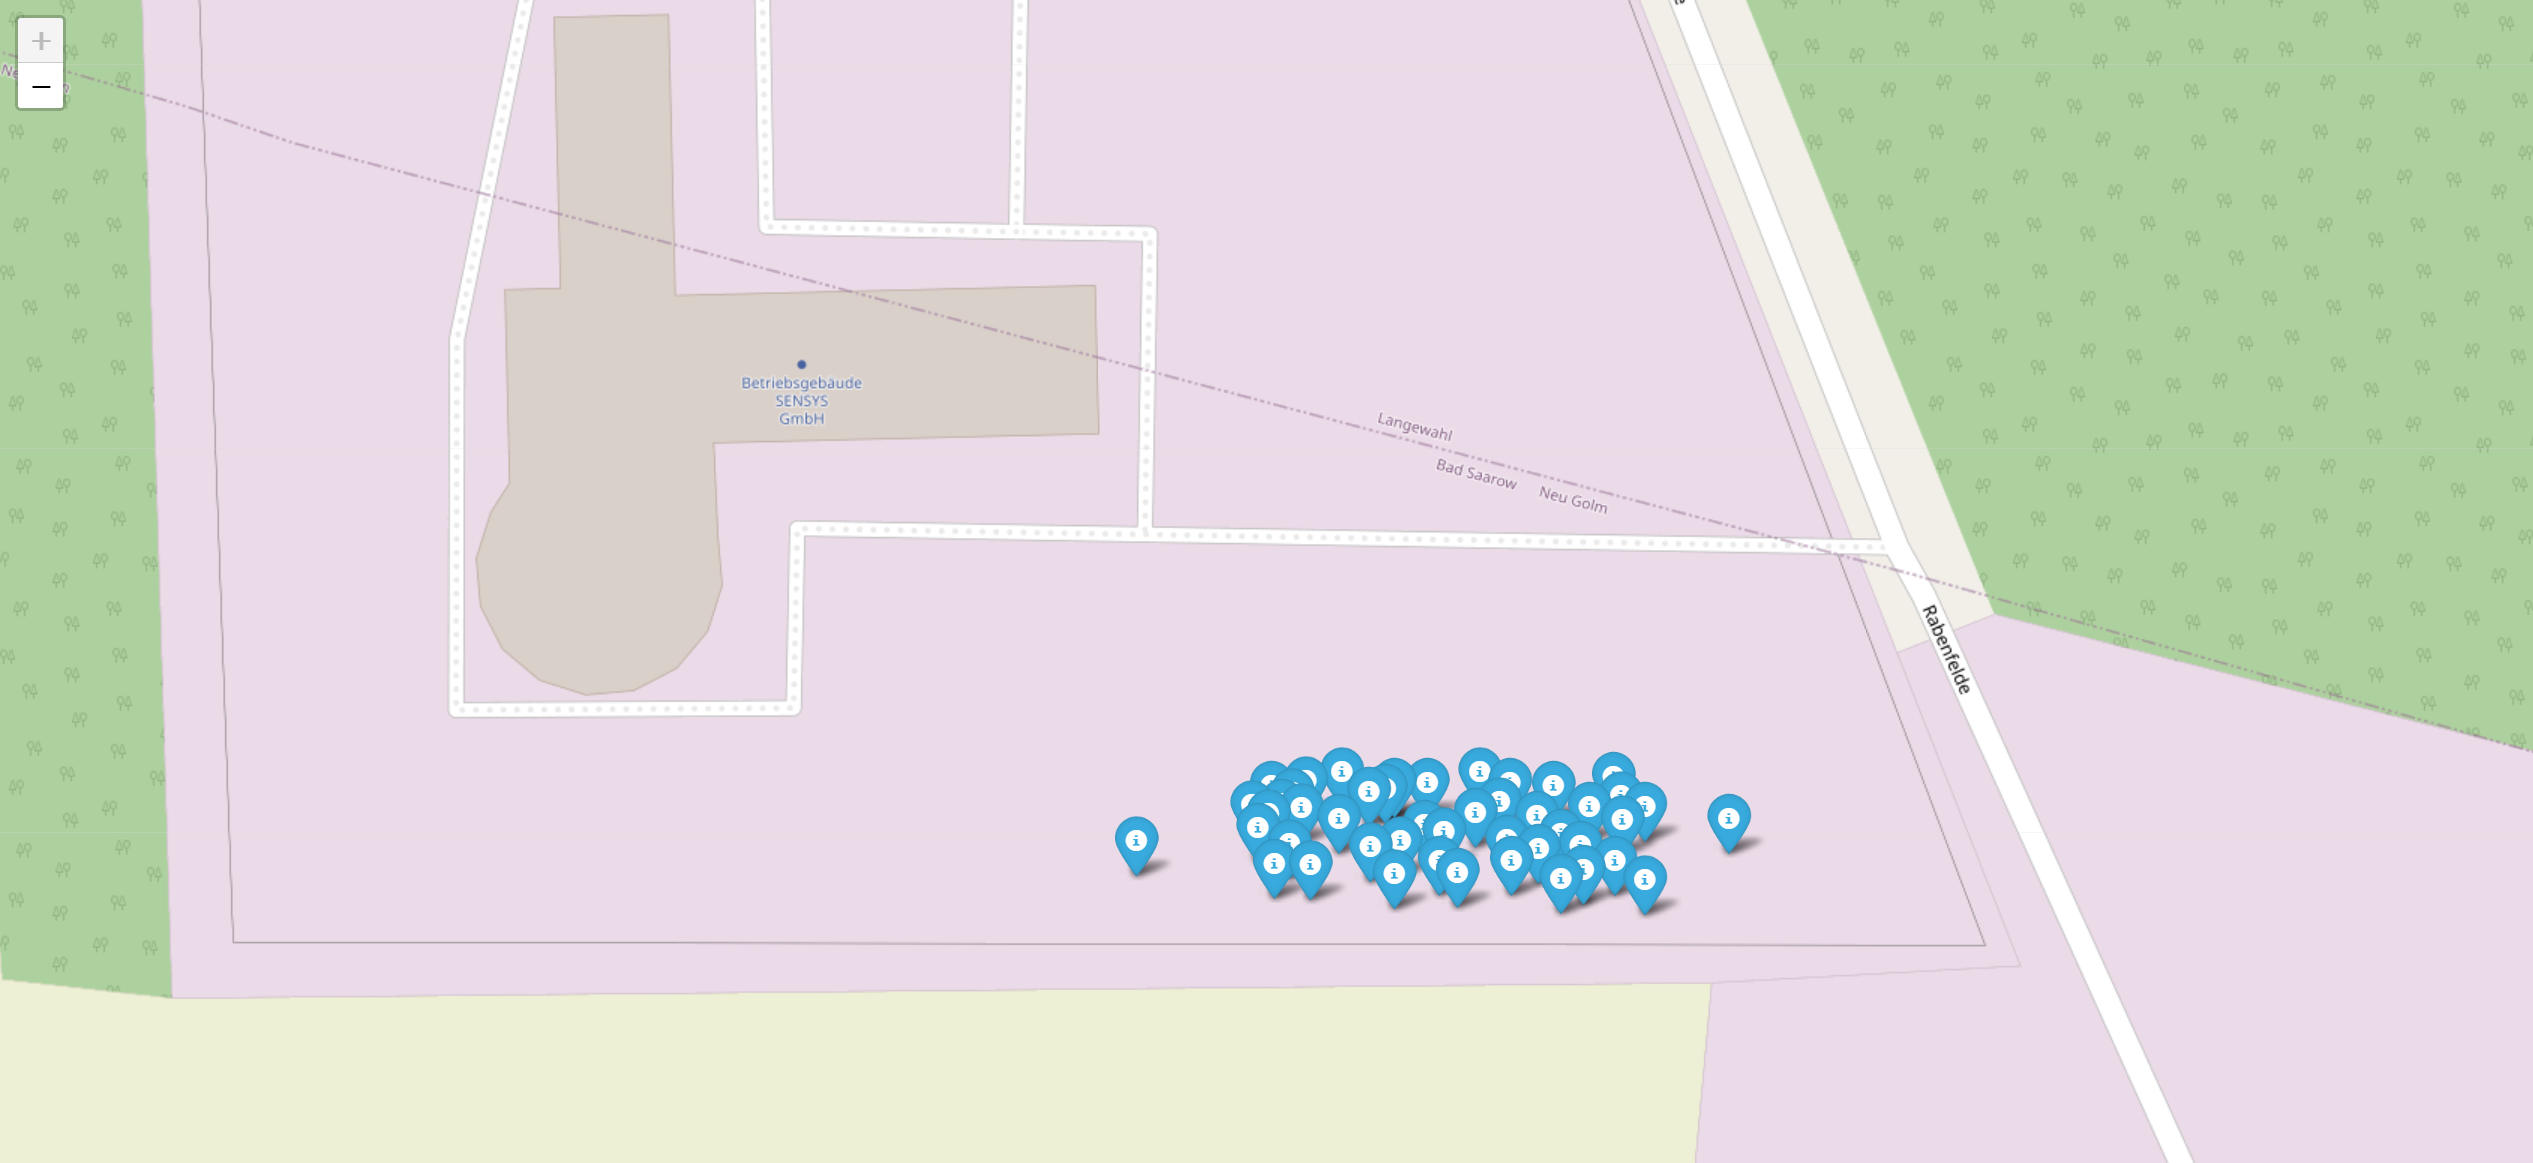

## Comparison Between Detected Anomalies and Ground Truth Data

### Observations:
1. **Ground Truth Locations:**
   - The `.kml` file appears to contain the precise locations and descriptions of various UXO (Unexploded Ordnance) types.
   - These include bombs, shells, and rockets with their coordinates specified.

2. **Detected Anomalies:**
   - The previously detected anomalies based on `TMI` deviations (3 standard deviations away from the mean) were visualized as red circles on the anomaly map.
   - These anomalies clustered in specific regions, potentially indicating UXO presence.

3. **Comparison:**
   - By overlaying the detected anomalies and ground truth data:
     - Many detected anomalies align with the ground truth locations from the `.kml` file.
     - Discrepancies, if present, could indicate false positives or missed detections due to noise or limitations in the anomaly detection method.

### Next Steps:
1. **Overlay Detected Anomalies with Ground Truth Data:**
   - Visualize both datasets on a single map to directly compare detected anomalies with ground truth locations.
2. **Evaluation Metrics:**
   - Compute evaluation metrics like True Positives, False Positives, False Negatives, and precision/recall based on the proximity of detected anomalies to ground truth points.
3. **Refine Anomaly Detection:**
   - Adjust thresholds or consider alternative features (e.g., clustering anomalies) to improve detection accuracy.

Let’s proceed with overlaying the datasets and evaluating the detection performance.


In [22]:
# Import libraries
import folium

# Create a map centered around the mean location of both datasets
mean_lat = (filtered_data['Latitude'].mean() + data.geometry.y.mean()) / 2
mean_lon = (filtered_data['Longitude'].mean() + data.geometry.x.mean()) / 2

# Initialize the map
comparison_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=17)

# Add detected anomalies to the map
for _, row in filtered_data[filtered_data['Anomaly']].iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6,
        tooltip="Detected Anomaly"
    ).add_to(comparison_map)

# Add ground truth data to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"Name: {row['Name']}<br>Description: {row['Description']}",
        icon=folium.Icon(color="blue", icon="info-sign"),
    ).add_to(comparison_map)

# Save the map to an HTML file
comparison_map.save("comparison_map.html")
print("Comparison map saved as 'comparison_map.html'. Open it in a browser to view.")


Comparison map saved as 'comparison_map.html'. Open it in a browser to view.


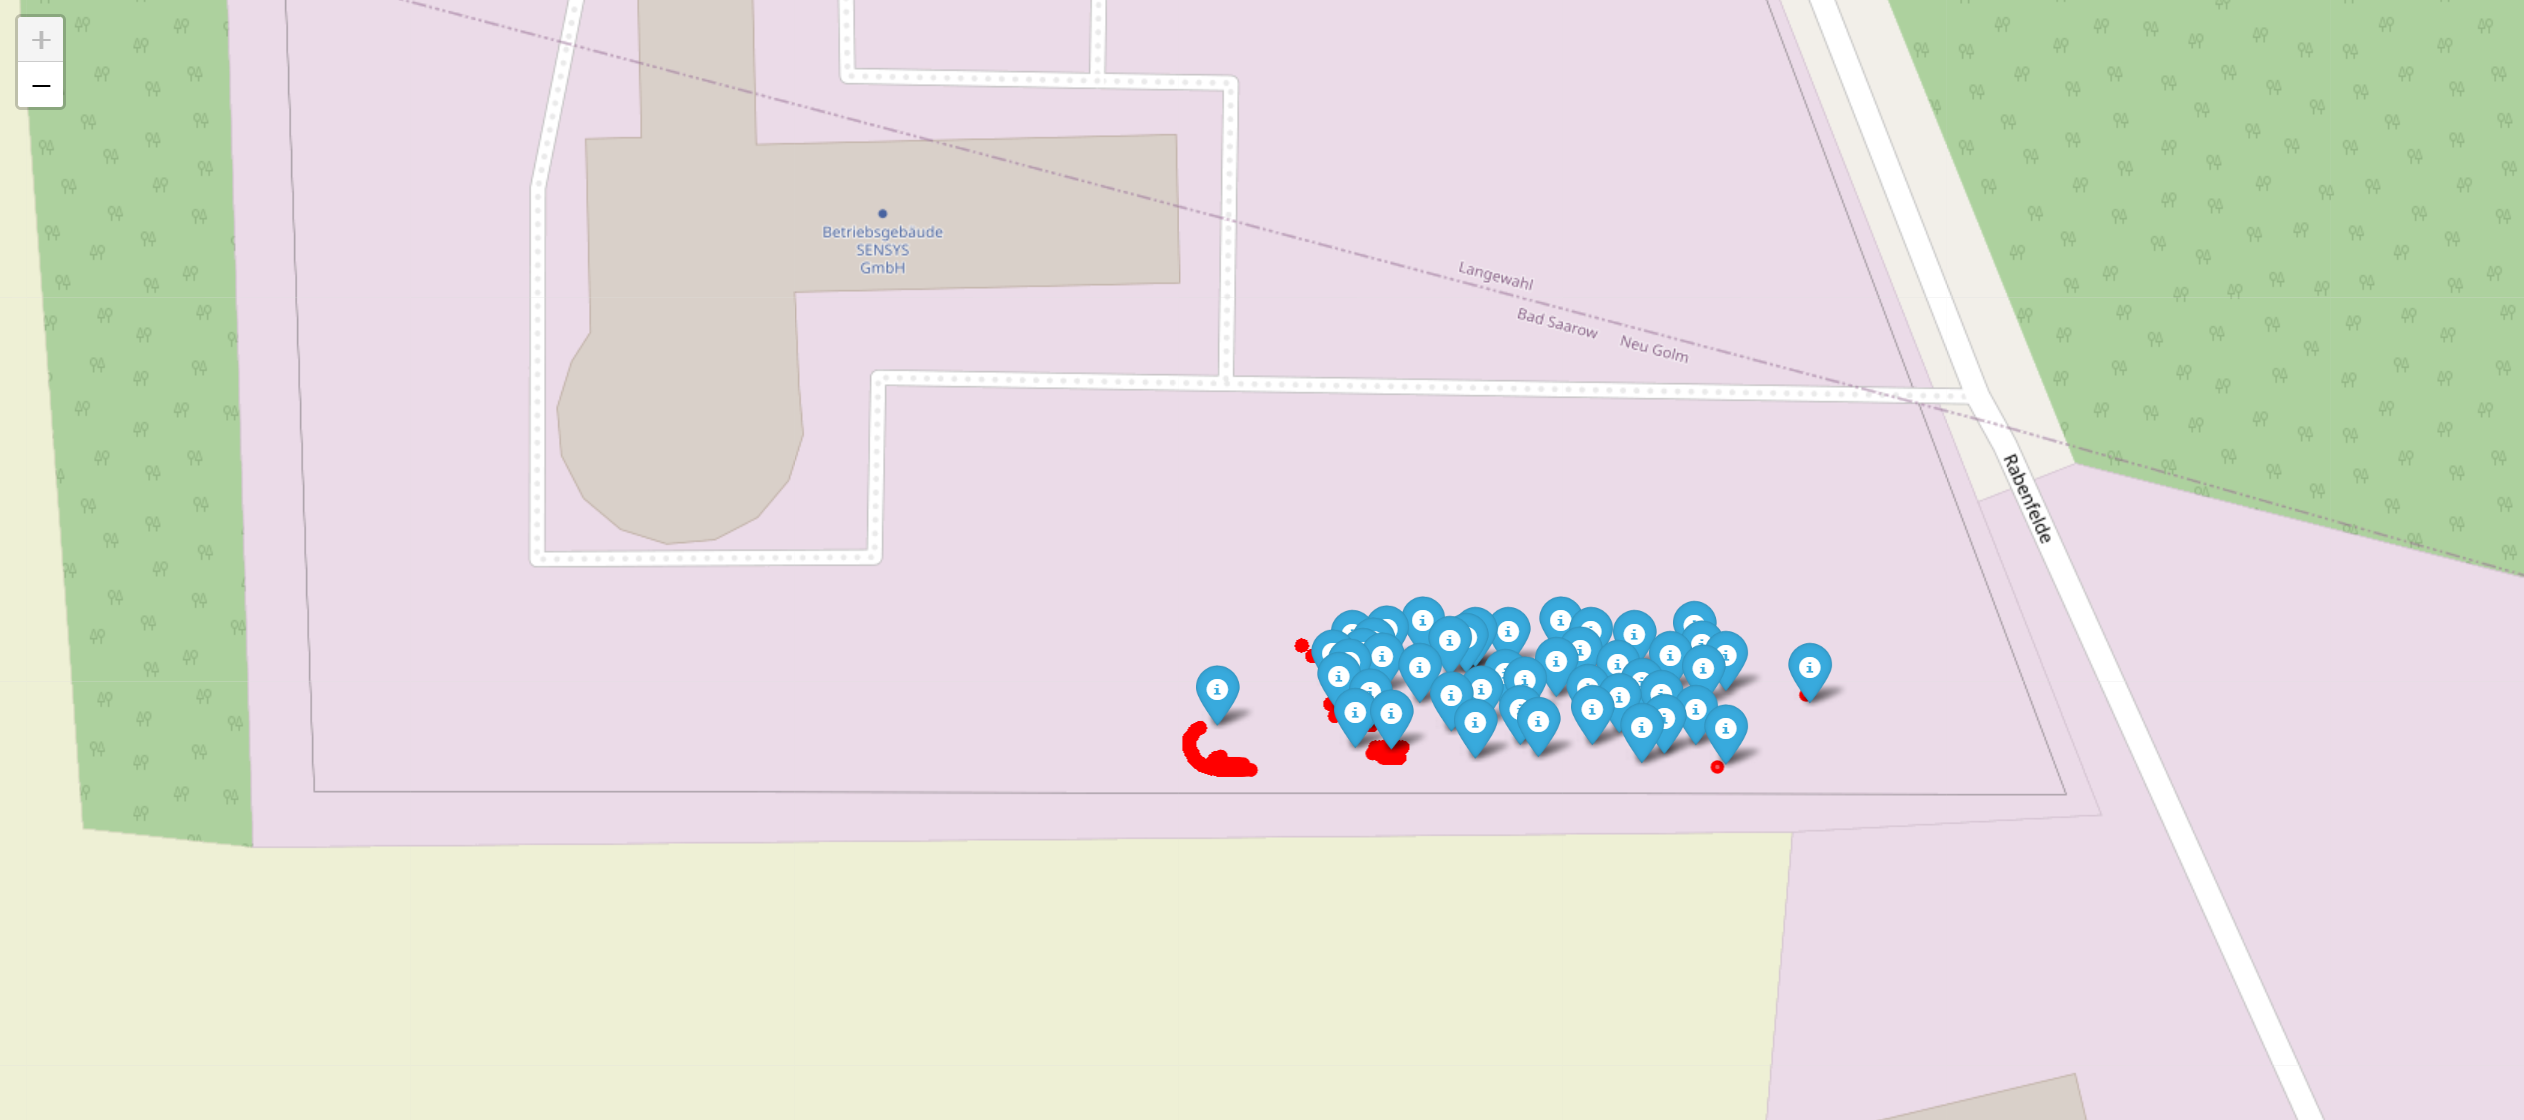

## Evaluating the Quality of Anomaly Detection

### Observations:
1. The current anomaly detection method based on 3 standard deviations of the `TMI` feature identified anomalies but does not perfectly align with the ground truth data.
2. To evaluate the quality of this method, we need to compute evaluation metrics:
   - True Positives (TP): Detected anomalies that match ground truth locations.
   - False Positives (FP): Detected anomalies not matching any ground truth location.
   - False Negatives (FN): Ground truth locations missed by the detection method.
   - Precision, Recall, and F1 Score will summarize the detection quality.
3. A proximity-based evaluation using geographic distances (e.g., Haversine Distance) will determine if a detected anomaly is close enough to a ground truth point to count as a match.

### Next Steps:
We will calculate these metrics using a threshold distance of 10 meters to define a match between detected anomalies and ground truth locations.


In [26]:
# Ground truth coordinates from the .kml file
ground_truth_coords = [(row.geometry.y, row.geometry.x) for _, row in data.iterrows()]

# Detected anomaly coordinates from the filtered dataset
detected_anomalies_coords = [
    (row['Latitude'], row['Longitude']) for _, row in filtered_data[filtered_data['Anomaly']].iterrows()
]

# Sanity check: Print the first few coordinates
print("Ground Truth Coordinates:", ground_truth_coords[:5])
print("Detected Anomalies Coordinates:", detected_anomalies_coords[:5])


Ground Truth Coordinates: [(52.31347005555558, 14.08797305555553), (52.31344336111109, 14.08828500000001), (52.31344966666665, 14.08882822222221), (52.31352483333334, 14.08838944444442), (52.31346202777778, 14.08869275000001)]
Detected Anomalies Coordinates: [(52.3135548, 14.08812643), (52.3135548, 14.08812643), (52.3135548, 14.08812643), (52.3135548, 14.08812643), (52.3135548, 14.08812643)]


In [32]:
import numpy as np
from geopy.distance import geodesic

# Define ground truth coordinates
ground_truth_coords = [(row.geometry.y, row.geometry.x) for _, row in data.iterrows()]

# Define detected anomaly coordinates
detected_anomalies_coords = [
    (row['Latitude'], row['Longitude']) for _, row in filtered_data[filtered_data['Anomaly']].iterrows()
]

# Refined evaluation function
def refined_evaluation(detected, ground_truth, threshold=10):
    matched_gt = set()  # Track matched ground truth points
    matched_anomalies = set()  # Track matched anomalies
    tp = 0  # True Positives

    # Compare each detected anomaly to ground truth points
    for i, anomaly in enumerate(detected):
        distances = [
            (idx, geodesic(anomaly, truth).meters) for idx, truth in enumerate(ground_truth)
        ]
        distances = [(idx, dist) for idx, dist in distances if idx not in matched_gt]  # Exclude already matched GT
        if distances:
            closest_gt, min_dist = min(distances, key=lambda x: x[1])
            if min_dist <= threshold:
                tp += 1
                matched_gt.add(closest_gt)
                matched_anomalies.add(i)

    fp = len(detected) - len(matched_anomalies)  # Remaining unmatched anomalies are False Positives
    fn = len(ground_truth) - len(matched_gt)  # Remaining unmatched ground truth are False Negatives

    return tp, fp, fn, matched_gt, matched_anomalies


# Evaluate using the refined method with a 10-meter threshold
# Evaluate using the refined method with a 10-meter threshold
tp, fp, fn, matched_gt, matched_anomalies = refined_evaluation(
    detected_anomalies_coords, ground_truth_coords, threshold=4
)


# Compute metrics
precision = tp / (tp + fp) 
recall = tp / (tp + fn) 
f1 = 2 * (precision * recall) / (precision + recall) 

# Print refined metrics
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


True Positives: 19
False Positives: 9267
False Negatives: 27
Precision: 0.00
Recall: 0.41
F1 Score: 0.00


In [31]:
# Create a new map
refined_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=17)

# Add True Positives
for idx in matched_gt:
    folium.Marker(
        location=[ground_truth_coords[idx][0], ground_truth_coords[idx][1]],
        icon=folium.Icon(color="green", icon="check"),
        tooltip="True Positive",
    ).add_to(refined_map)

# Add False Positives
for i, anomaly in enumerate(detected_anomalies_coords):
    if i not in matched_anomalies:
        folium.CircleMarker(
            location=[anomaly[0], anomaly[1]],
            radius=5,
            color="red",
            fill=True,
            fill_opacity=0.6,
            tooltip="False Positive",
        ).add_to(refined_map)

# Add False Negatives
for i, truth in enumerate(ground_truth_coords):
    if i not in matched_gt:
        folium.Marker(
            location=[truth[0], truth[1]],
            icon=folium.Icon(color="orange", icon="exclamation"),
            tooltip="False Negative",
        ).add_to(refined_map)

# Save the map
refined_map.save("refined_comparison_map.html")
print("Refined map saved as 'refined_comparison_map.html'. Open it in a browser to view.")


Refined map saved as 'refined_comparison_map.html'. Open it in a browser to view.
